In [7]:
import pandas as pd

In [10]:
import os
print (os.getcwd())

/Users/armandoordoricadelatorre/Downloads/Covid tweets csvs


In [11]:
import glob, os
for file in glob.glob("*.csv"):
    print(file)

combined_csv.csv
us_twitter_covid_data.csv


In [12]:
glob.glob('./*.csv')

['./combined_csv.csv', './us_twitter_covid_data.csv']

In [13]:
files = os.listdir(os.curdir)  #files and directories
files

['covid_march_tweets.ipynb',
 'combined_csv.csv',
 '2020-03-00 Coronavirus Tweets (pre 2020-03-12).CSV',
 '2020-03-24 Coronavirus Tweets.CSV',
 '2020-03-15 Coronavirus Tweets.CSV',
 '2020-03-23 Coronavirus Tweets.CSV',
 '2020-03-12 Coronavirus Tweets.CSV',
 '2020-03-18 Coronavirus Tweets.CSV',
 '2020-03-20 Coronavirus Tweets.CSV',
 '2020-03-27 Coronavirus Tweets.CSV',
 '2020-03-16 Coronavirus Tweets.CSV',
 '2020-03-17 Coronavirus Tweets.CSV',
 '.ipynb_checkpoints',
 '2020-03-26 Coronavirus Tweets.CSV',
 'us_twitter_covid_data.csv',
 '2020-03-21 Coronavirus Tweets.CSV',
 '2020-03-19 Coronavirus Tweets.CSV',
 '2020-03-13 Coronavirus Tweets.CSV',
 '2020-03-22 Coronavirus Tweets.CSV',
 '2020-03-28 Coronavirus Tweets.CSV',
 'create_combined_csv.ipynb',
 '2020-03-14 Coronavirus Tweets.CSV',
 '2020-03-25 Coronavirus Tweets.CSV']

### Importing the data

In [140]:
df = pd.read_csv('combined_csv.csv')

In [141]:
df_us = df[df['country_code']=='US']

In [142]:
df_us[df_us['place_full_name'].str.match('NY')]['place_full_name']

59883       NYC Office of Emergency Management (OEM)
3161873                  NYSE Euronext San Francisco
6507011                   NYU Langone Medical Center
6563511                          NYU Kimmel Pavilion
12129623                    NYU LGBTQ Student Center
13596544               NYC Health + Hospitals/Jacobi
14629098                        NYC Diamond District
Name: place_full_name, dtype: object

In [143]:
df_us[df_us['place_full_name'].str.match('ny')]['place_full_name']

620037    nyc
Name: place_full_name, dtype: object

In [144]:
df_us[df_us['place_full_name'].str.match('NY')]['place_full_name']

59883       NYC Office of Emergency Management (OEM)
3161873                  NYSE Euronext San Francisco
6507011                   NYU Langone Medical Center
6563511                          NYU Kimmel Pavilion
12129623                    NYU LGBTQ Student Center
13596544               NYC Health + Hospitals/Jacobi
14629098                        NYC Diamond District
Name: place_full_name, dtype: object

In [145]:
mask = df_us['place_full_name'].str.contains('NY')

In [146]:
mask_index_list = list(df_us[mask].index)

In [147]:
mask2 = df_us['place_full_name'].str.contains('New York')
mask2_index_list = list(df_us[mask2].index)

In [148]:
indices = mask_index_list  + mask2_index_list

In [149]:
df_us.ix[indices]['place_full_name']

/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


48             Queens, NY
1111        Manhattan, NY
1701        Manhattan, NY
1737         Brooklyn, NY
2344         New York, NY
                ...      
15443927     New York, NY
15447672     New York, NY
15453231    New York, USA
15453397     New York, NY
15456638    New York, USA
Name: place_full_name, Length: 20692, dtype: object

In [218]:
df_ny = df_us.ix[indices]

/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [219]:
df_ny.lang.unique()

array(['en', 'und', 'it', 'tr', 'es', 'da', 'pt', 'ja', 'ar', 'fr', 'th',
       'ur', 'cy', 'hi', 'nl', 'ht', 'in', 'ca', 'de', 'pl', 'lt', 'et',
       'ru', 'ro', 'fi', 'tl', 'zh', 'sv', 'cs', 'vi', 'ne', 'ko', 'mr',
       'lv'], dtype=object)

In [220]:
filter1 = df_ny['lang']=='en'

In [221]:
filter2 = df_ny['lang']=='und'

In [222]:
df_ny.where(filter1 | filter2, inplace = True) 

In [223]:
cols = list(df_ny.columns)

In [224]:
cols = [
 'created_at',
 'text',
 'source',
 'is_quote',
 'is_retweet',
 'favourites_count',
 'retweet_count',
 'place_full_name',
 'place_type',
 'followers_count',
 'friends_count',
 'account_created_at',]

In [225]:
df_ny = df_ny[cols]

In [226]:
import re 

# Create a function to clean the tweets
def cleanTxt(text):
    text = str(text)
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink

    return text

In [227]:
df_ny['text'] = df_ny['text'].apply(cleanTxt)

In [228]:
df_ny

,created_at,text,source,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,account_created_at
48,2020-03-04T11:22:46Z,Can &amp; focus on tackling potential Corona...,Twitter for iPhone,False,False,25462,0.0,"Queens, NY",city,12378,13567,2009-01-21T21:17:54Z
1111,2020-03-04T13:46:00Z,(3/3) \n🧳 Self-evaluation of inherent bias/rac...,Twitter for iPhone,False,False,6366,0.0,"Manhattan, NY",city,656,829,2017-12-03T21:45:57Z
1701,2020-03-04T14:39:30Z,Sensible feedback on the CoronavirusOutbreak,Twitter for iPhone,True,False,1623,0.0,"Manhattan, NY",city,248,1309,2018-02-06T22:46:58Z
1737,2020-03-04T14:41:57Z,Bill Gates tried to warn us 4 years ago about ...,Twitter for Android,False,False,39912,0.0,"Brooklyn, NY",city,1511,2619,2009-06-19T20:33:46Z
2344,2020-03-04T15:44:59Z,👀😁CoronavirusOutbreak,Twitter for iPhone,False,False,41637,0.0,"New York, NY",admin,358,563,2019-05-08T11:02:45Z
...,...,...,...,...,...,...,...,...,...,...,...,...
15443927,2020-03-25T23:13:33Z,Takeout in the age of coronavirus:\n\nStep 1: ...,Twitter for iPhone,False,False,20,0.0,"New York, NY",admin,3,11,2020-03-07T05:35:22Z
15447672,2020-03-25T23:22:18Z,JOIN US LIVE: We might be isolated and SocialD...,Twitter for Android,False,False,850,2.0,"New York, NY",admin,1243,954,2008-12-12T16:25:35Z
15453231,2020-03-25T23:34:43Z,COVID19,Twitter for iPhone,False,False,17646,0.0,"New York, USA",admin,1312,2165,2008-10-27T19:40:19Z
15453397,2020-03-25T23:35:05Z,"Missing the Broadcast Center, missing the tea...",Twitter for Android,False,False,294926,0.0,"New York, NY",admin,1394,1369,2010-09-12T17:17:03Z


In [235]:
from textblob import TextBlob

# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [236]:
df_ny

,created_at,text,source,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,account_created_at
48,2020-03-04T11:22:46Z,Can &amp; focus on tackling potential Corona...,Twitter for iPhone,False,False,25462,0.0,"Queens, NY",city,12378,13567,2009-01-21T21:17:54Z
1111,2020-03-04T13:46:00Z,(3/3) \n🧳 Self-evaluation of inherent bias/rac...,Twitter for iPhone,False,False,6366,0.0,"Manhattan, NY",city,656,829,2017-12-03T21:45:57Z
1701,2020-03-04T14:39:30Z,Sensible feedback on the CoronavirusOutbreak,Twitter for iPhone,True,False,1623,0.0,"Manhattan, NY",city,248,1309,2018-02-06T22:46:58Z
1737,2020-03-04T14:41:57Z,Bill Gates tried to warn us 4 years ago about ...,Twitter for Android,False,False,39912,0.0,"Brooklyn, NY",city,1511,2619,2009-06-19T20:33:46Z
2344,2020-03-04T15:44:59Z,👀😁CoronavirusOutbreak,Twitter for iPhone,False,False,41637,0.0,"New York, NY",admin,358,563,2019-05-08T11:02:45Z
...,...,...,...,...,...,...,...,...,...,...,...,...
15443927,2020-03-25T23:13:33Z,Takeout in the age of coronavirus:\n\nStep 1: ...,Twitter for iPhone,False,False,20,0.0,"New York, NY",admin,3,11,2020-03-07T05:35:22Z
15447672,2020-03-25T23:22:18Z,JOIN US LIVE: We might be isolated and SocialD...,Twitter for Android,False,False,850,2.0,"New York, NY",admin,1243,954,2008-12-12T16:25:35Z
15453231,2020-03-25T23:34:43Z,COVID19,Twitter for iPhone,False,False,17646,0.0,"New York, USA",admin,1312,2165,2008-10-27T19:40:19Z
15453397,2020-03-25T23:35:05Z,"Missing the Broadcast Center, missing the tea...",Twitter for Android,False,False,294926,0.0,"New York, NY",admin,1394,1369,2010-09-12T17:17:03Z


In [237]:
df_ny['Subjectivity'] = df_ny['text'].apply(getSubjectivity)

In [238]:
df_ny['Polarity'] = df_ny['text'].apply(getPolarity)

In [239]:
df_ny

,created_at,text,source,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,account_created_at,Subjectivity,Polarity
48,2020-03-04T11:22:46Z,Can &amp; focus on tackling potential Corona...,Twitter for iPhone,False,False,25462,0.0,"Queens, NY",city,12378,13567,2009-01-21T21:17:54Z,0.650000,0.500000
1111,2020-03-04T13:46:00Z,(3/3) \n🧳 Self-evaluation of inherent bias/rac...,Twitter for iPhone,False,False,6366,0.0,"Manhattan, NY",city,656,829,2017-12-03T21:45:57Z,0.472727,0.113636
1701,2020-03-04T14:39:30Z,Sensible feedback on the CoronavirusOutbreak,Twitter for iPhone,True,False,1623,0.0,"Manhattan, NY",city,248,1309,2018-02-06T22:46:58Z,0.000000,0.000000
1737,2020-03-04T14:41:57Z,Bill Gates tried to warn us 4 years ago about ...,Twitter for Android,False,False,39912,0.0,"Brooklyn, NY",city,1511,2619,2009-06-19T20:33:46Z,0.477273,0.018182
2344,2020-03-04T15:44:59Z,👀😁CoronavirusOutbreak,Twitter for iPhone,False,False,41637,0.0,"New York, NY",admin,358,563,2019-05-08T11:02:45Z,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15443927,2020-03-25T23:13:33Z,Takeout in the age of coronavirus:\n\nStep 1: ...,Twitter for iPhone,False,False,20,0.0,"New York, NY",admin,3,11,2020-03-07T05:35:22Z,0.638889,0.055556
15447672,2020-03-25T23:22:18Z,JOIN US LIVE: We might be isolated and SocialD...,Twitter for Android,False,False,850,2.0,"New York, NY",admin,1243,954,2008-12-12T16:25:35Z,0.500000,0.136364
15453231,2020-03-25T23:34:43Z,COVID19,Twitter for iPhone,False,False,17646,0.0,"New York, USA",admin,1312,2165,2008-10-27T19:40:19Z,0.000000,0.000000
15453397,2020-03-25T23:35:05Z,"Missing the Broadcast Center, missing the tea...",Twitter for Android,False,False,294926,0.0,"New York, NY",admin,1394,1369,2010-09-12T17:17:03Z,0.125000,-0.041667


In [240]:
allWords = ' '.join([twts for twts in df_ny['text']])


In [244]:
!pip install wordcloud

     |████████████████████████████████| 163kB 2.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [245]:
from wordcloud import WordCloud

wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

In [247]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

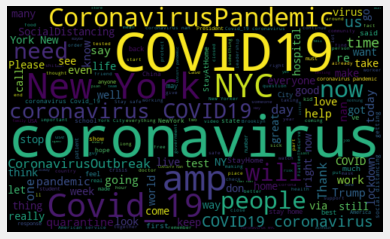

In [248]:
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [251]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'



In [252]:

df_ny['Analysis'] = df_ny['Polarity'].apply(getAnalysis)

# Show the dataframe


,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1235160526780416001,1163436067904618496,2020-03-04T11:09:52Z,Nanank08000089,#CoronaVirusIndonesia \n#CoronaBukaBorokRezim ...,Twitter for Android,NaN,NaN,NaN,False,...,0.0,NaN,NaN,NaN,21,142,NaN,2019-08-19T13:02:45Z,False,und
1,1235160526780416001,1163436067904618496,2020-03-04T11:09:52Z,Nanank08000089,#CoronaVirusIndonesia \n#CoronaBukaBorokRezim ...,Twitter for Android,NaN,NaN,NaN,False,...,0.0,NaN,NaN,NaN,21,142,NaN,2019-08-19T13:02:45Z,False,und
2,1235160546451873797,2255210942,2020-03-04T11:09:57Z,David_Mulroney,China’s wildlife trade via @SCMPgraphics http...,Twitter for iPad,NaN,NaN,NaN,False,...,2.0,NaN,NaN,NaN,5666,2796,NaN,2013-12-20T16:14:18Z,False,en
3,1235160597475602432,366491737,2020-03-04T11:10:09Z,MarykeSchoonen,Proof that the media such as @CNN is unnecessa...,Twitter for iPhone,NaN,NaN,NaN,False,...,0.0,NaN,NaN,NaN,41,94,NaN,2011-09-02T08:22:14Z,False,en
4,1235160647614291968,61557732,2020-03-04T11:10:21Z,Arjit_Garg,Indians are a shitty breed of humans. With the...,Twitter for Android,NaN,NaN,NaN,False,...,0.0,IN,"Greater Noida, India",city,486,50,NaN,2009-07-30T18:18:25Z,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15464834,1242964479270440960,51208489,2020-03-25T23:59:59Z,AgenciaBrasilia,#CORONAVÍRUS | Distribuidora de medicamentos é...,Twitter Web App,NaN,NaN,NaN,False,...,1.0,NaN,NaN,NaN,16205,139,NaN,2009-06-26T20:19:00Z,True,pt
15464835,1242964477408096256,2437852846,2020-03-25T23:59:59Z,fo_sag,"#Coronavirus : définition, transmission, sympt...",Twitter for Android,NaN,NaN,NaN,False,...,0.0,NaN,NaN,NaN,24355,25439,NaN,2014-03-26T13:08:33Z,False,fr
15464836,1242964477319843840,246064793,2020-03-25T23:59:59Z,MarkRonchettiNM,Ava is done with the house. She needs some fr...,Tweetbot for iΟS,NaN,NaN,NaN,False,...,5.0,NaN,NaN,NaN,11846,1486,NaN,2011-02-02T01:51:38Z,True,en
15464837,1242964477043064832,3280974990,2020-03-25T23:59:59Z,kennylatimer216,Anyone else notice her timeline?\nShe tweeting...,Twitter for Android,NaN,NaN,NaN,True,...,0.0,NaN,NaN,NaN,3635,3935,NaN,2015-07-15T23:01:02Z,False,en


In [253]:
df_ny

,created_at,text,source,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,account_created_at,Subjectivity,Polarity,Analysis
48,2020-03-04T11:22:46Z,Can &amp; focus on tackling potential Corona...,Twitter for iPhone,False,False,25462,0.0,"Queens, NY",city,12378,13567,2009-01-21T21:17:54Z,0.650000,0.500000,Positive
1111,2020-03-04T13:46:00Z,(3/3) \n🧳 Self-evaluation of inherent bias/rac...,Twitter for iPhone,False,False,6366,0.0,"Manhattan, NY",city,656,829,2017-12-03T21:45:57Z,0.472727,0.113636,Positive
1701,2020-03-04T14:39:30Z,Sensible feedback on the CoronavirusOutbreak,Twitter for iPhone,True,False,1623,0.0,"Manhattan, NY",city,248,1309,2018-02-06T22:46:58Z,0.000000,0.000000,Neutral
1737,2020-03-04T14:41:57Z,Bill Gates tried to warn us 4 years ago about ...,Twitter for Android,False,False,39912,0.0,"Brooklyn, NY",city,1511,2619,2009-06-19T20:33:46Z,0.477273,0.018182,Positive
2344,2020-03-04T15:44:59Z,👀😁CoronavirusOutbreak,Twitter for iPhone,False,False,41637,0.0,"New York, NY",admin,358,563,2019-05-08T11:02:45Z,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15443927,2020-03-25T23:13:33Z,Takeout in the age of coronavirus:\n\nStep 1: ...,Twitter for iPhone,False,False,20,0.0,"New York, NY",admin,3,11,2020-03-07T05:35:22Z,0.638889,0.055556,Positive
15447672,2020-03-25T23:22:18Z,JOIN US LIVE: We might be isolated and SocialD...,Twitter for Android,False,False,850,2.0,"New York, NY",admin,1243,954,2008-12-12T16:25:35Z,0.500000,0.136364,Positive
15453231,2020-03-25T23:34:43Z,COVID19,Twitter for iPhone,False,False,17646,0.0,"New York, USA",admin,1312,2165,2008-10-27T19:40:19Z,0.000000,0.000000,Neutral
15453397,2020-03-25T23:35:05Z,"Missing the Broadcast Center, missing the tea...",Twitter for Android,False,False,294926,0.0,"New York, NY",admin,1394,1369,2010-09-12T17:17:03Z,0.125000,-0.041667,Negative


In [269]:
sortedDF = df_ny.sort_values(by=['Polarity']) 

In [270]:
sortedDF.reset_index(drop=True)

,created_at,text,source,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,account_created_at,Subjectivity,Polarity,Analysis
0,2020-03-20T17:02:32Z,"""Leadership"" in the USA, today.\nAndrewCuomo: ...",Twitter Web Client,False,False,115782,6.0,"Brooklyn, NY",city,16885,15535,2016-05-07T23:13:39Z,1.00,-1.0,Negative
1,2020-03-13T18:42:26Z,🗣shout out to all you nasty ass people that do...,Twitter for iPhone,True,False,13200,0.0,"Queens, NY",city,704,625,2009-03-24T09:03:36Z,1.00,-1.0,Negative
2,2020-03-15T21:55:23Z,I had the worst nightmare. All the stores wer...,Twitter for iPhone,False,False,6175,0.0,"Tarrytown, NY",city,2699,4915,2009-02-06T13:25:17Z,1.00,-1.0,Negative
3,2020-03-15T21:55:26Z,Laziest Mayor ever\nWorst mayor ever\nbilldeb...,Twitter for iPhone,False,False,106473,0.0,"Manhattan, NY",city,690,608,2015-01-11T11:11:48Z,1.00,-1.0,Negative
4,2020-03-22T17:21:22Z,We imagine 'the end' as a world-devastating ev...,Instagram,False,False,1282,0.0,"Brooklyn, NY",city,696,568,2009-03-10T19:35:38Z,1.00,-1.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20687,2020-03-18T13:15:34Z,It’s 9:15 let’s have a great day everybody! Co...,Twitter for iPhone,False,False,20588,2.0,"Farmingdale, NY",city,495,1654,2017-07-14T14:44:40Z,0.75,1.0,Positive
20688,2020-03-10T17:11:02Z,Continuing my battle on misinformation during ...,Twitter for iPhone,False,False,18857,1063.0,"Manhattan, NY",city,219002,129,2013-06-18T00:50:56Z,0.30,1.0,Positive
20689,2020-03-13T20:31:52Z,Trump never accepts responsibility for anythin...,Twitter for iPhone,False,False,129115,0.0,"Manhattan, NY",city,10697,5200,2011-08-27T11:48:00Z,1.00,1.0,Positive
20690,2020-03-23T21:31:48Z,Lol! Don't Stand So Close To Me comes to mind...,Twitter for Android,False,False,72028,1.0,"Castleton-on-Hudson, NY",city,2021,2437,2009-03-12T22:11:43Z,0.70,1.0,Positive


### Printing Negative Tweets

In [276]:
for i in range(1, 101):
    print(str(i) + ') ' + sortedDF.iloc[i].text)
    print()

1) 🗣shout out to all you nasty ass people that don’t wash your hands
CoronavirusPandemic 

2) I had the worst nightmare.  All the stores were sold out of everything except Peeps. CoronavirusOutbreak StayTheFHome ShutDownMASS HighRiskCovid19 SocialDistancingNow SundayThoughts PEEPS

3)  Laziest Mayor ever
Worst mayor ever
billdeblasio deBlasio nyc newyork cotonavirus CoronavirusOutbreak coronavirusnewyork

4) We imagine 'the end' as a world-devastating event, but every time there's a terrible earthquake, a tsunami, an outbreak of disease - that's apocalyptic, on a micro-scale.
-Marjorie Liu
coronavirus thepeoplesartist… 

5) These people are insane. Egypt coronavirus COVID19 protest. 

6)  really disappointed at the price gouging taking place with my reservation in Buffalo. SHAME ON YOU!! CoronavirusPandemic CoronaVirusUpdate Covid_19 cancellation

7) Watching awful job being done by  talking to  about a tweet that was or was not supposedly sent out by NYC health commissioner. Get your 

In [277]:
inverseSortedDF = df_ny.sort_values(by=['Polarity'], ascending= False) 

In [278]:
inverseSortedDF.reset_index(drop=True)

,created_at,text,source,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,account_created_at,Subjectivity,Polarity,Analysis
0,2020-03-17T04:46:14Z,Welcome to The Swabbing 20s!\nCOVID19,Twitter for Android,False,False,22979,0.0,"Manhattan, NY",city,1369,4999,2015-10-27T21:46:28Z,0.90,1.0,Positive
1,2020-03-20T18:58:31Z,Just reached out to all my students today! Gre...,Twitter for iPhone,False,False,304,0.0,"New York, USA",admin,28,117,2015-03-25T16:43:20Z,0.75,1.0,Positive
2,2020-03-28T16:03:14Z,This is after everyone was told mask would not...,Twitter for iPhone,True,False,14018,4.0,"New York, NY",admin,9744,6534,2014-10-21T01:55:47Z,0.80,1.0,Positive
3,2020-03-28T16:03:14Z,This is after everyone was told mask would not...,Twitter for iPhone,True,False,14018,4.0,"New York, NY",admin,9744,6534,2014-10-21T01:55:47Z,0.80,1.0,Positive
4,2020-03-23T10:25:13Z,Excellent from .. Captures perfectly the self ...,Twitter for iPhone,True,False,4049,0.0,"Manhattan, NY",city,258,383,2009-06-21T13:31:15Z,1.00,1.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20687,2020-03-14T17:44:55Z,In this grim time because of the CoronavirusPa...,Twitter for iPhone,False,False,9291,0.0,"New York, USA",admin,547,613,2009-07-30T13:47:01Z,1.00,-1.0,Negative
20688,2020-03-16T01:37:04Z,Trump isn’t going to debate...he’s going to co...,Twitter for iPhone,True,False,7457,0.0,"Brooklyn, NY",city,244,880,2012-08-12T15:28:02Z,1.00,-1.0,Negative
20689,2020-03-20T16:36:16Z,"""What do you say to Americans who are scared?""...",Twitter Web Client,False,False,115785,4.0,"Brooklyn, NY",city,16885,15535,2016-05-07T23:13:39Z,1.00,-1.0,Negative
20690,2020-03-28T16:37:38Z,StayAtHomeAndStaySafe COVID19 has officially g...,Twitter for iPhone,False,False,682,0.0,"Latham, NY",city,720,3748,2014-11-26T16:18:40Z,1.00,-1.0,Negative


In [279]:
for i in range(1, 101):
    print(str(i) + ') ' + inverseSortedDF.iloc[i].text)
    print()

1) Just reached out to all my students today! Great conversations! COVID19  educators2020

2) This is after everyone was told mask would not be effective??!!!

Covid_19 CoronaUpdate 

3) This is after everyone was told mask would not be effective??!!!

Covid_19 CoronaUpdate 

4) Excellent from .. Captures perfectly the self pitying behavior of IMPOTUS 

COVIDー19 CoronavirusPandemic CoronaVirusUpdate LockdownNow MondayMorning MondayMood TrumptheWorstPresidentEVER TrumpPressConference TrumpPandemic TrumpRecession Trumpdemic 

5)  You call it coronavirus ..i call it the best April Fool Prank ever. 

6)  Maybe not the best time? COVID19

7) GoodMorning🌞 HappyTuesday 
Everyone Read It &amp; Share it ,This is a great Way to calculate that how the symptoms are calculating and how we should react!!
stayhome beresponsible stopcoronavirus  coronavirus shareit healthcare everyone stayathome savelives awareness 

8) Happy to announce that 46 will be joining us for pancchat tonight! Tune in at 8pm 

In [283]:
# Plotting
plt.figure(figsize=(8,6))
# for i in range(0, df_ny.shape[0]):
#     plt.scatter(df_ny["Polarity"][i], df_ny["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)
 

# # plt.title('Sentiment Analysis')
# # plt.xlabel('Polarity')
# # plt.ylabel('Subjectivity')
# # plt.show()

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [289]:
df_ny["Polarity"]

48          0.500000
1111        0.113636
1701        0.000000
1737        0.018182
2344        0.000000
              ...   
15443927    0.055556
15447672    0.136364
15453231    0.000000
15453397   -0.041667
15456638    0.000000
Name: Polarity, Length: 20692, dtype: float64

In [292]:
df_ny.reset_index(drop=True)

,created_at,text,source,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,account_created_at,Subjectivity,Polarity,Analysis
0,2020-03-04T11:22:46Z,Can &amp; focus on tackling potential Corona...,Twitter for iPhone,False,False,25462,0.0,"Queens, NY",city,12378,13567,2009-01-21T21:17:54Z,0.650000,0.500000,Positive
1,2020-03-04T13:46:00Z,(3/3) \n🧳 Self-evaluation of inherent bias/rac...,Twitter for iPhone,False,False,6366,0.0,"Manhattan, NY",city,656,829,2017-12-03T21:45:57Z,0.472727,0.113636,Positive
2,2020-03-04T14:39:30Z,Sensible feedback on the CoronavirusOutbreak,Twitter for iPhone,True,False,1623,0.0,"Manhattan, NY",city,248,1309,2018-02-06T22:46:58Z,0.000000,0.000000,Neutral
3,2020-03-04T14:41:57Z,Bill Gates tried to warn us 4 years ago about ...,Twitter for Android,False,False,39912,0.0,"Brooklyn, NY",city,1511,2619,2009-06-19T20:33:46Z,0.477273,0.018182,Positive
4,2020-03-04T15:44:59Z,👀😁CoronavirusOutbreak,Twitter for iPhone,False,False,41637,0.0,"New York, NY",admin,358,563,2019-05-08T11:02:45Z,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20687,2020-03-25T23:13:33Z,Takeout in the age of coronavirus:\n\nStep 1: ...,Twitter for iPhone,False,False,20,0.0,"New York, NY",admin,3,11,2020-03-07T05:35:22Z,0.638889,0.055556,Positive
20688,2020-03-25T23:22:18Z,JOIN US LIVE: We might be isolated and SocialD...,Twitter for Android,False,False,850,2.0,"New York, NY",admin,1243,954,2008-12-12T16:25:35Z,0.500000,0.136364,Positive
20689,2020-03-25T23:34:43Z,COVID19,Twitter for iPhone,False,False,17646,0.0,"New York, USA",admin,1312,2165,2008-10-27T19:40:19Z,0.000000,0.000000,Neutral
20690,2020-03-25T23:35:05Z,"Missing the Broadcast Center, missing the tea...",Twitter for Android,False,False,294926,0.0,"New York, NY",admin,1394,1369,2010-09-12T17:17:03Z,0.125000,-0.041667,Negative


KeyboardInterrupt: 

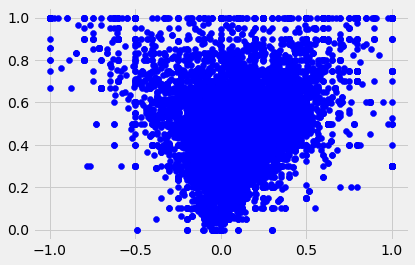

In [293]:
for i in range(0, df_ny.shape[0]):
    plt.scatter(df_ny["Polarity"].iloc[i], df_ny["Subjectivity"].iloc[i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [296]:

# Print the percentage of positive tweetsptweets = df_ny[df_ny.Analysis == 'Positive']
ptweets = df_ny[df_ny.Analysis == 'Positive']
ptweets = ptweets['text']
ptweets

round( (ptweets.shape[0] / df_ny.shape[0]) * 100 , 1)

44.3

In [297]:

# Print the percentage of negative tweets
ntweets = df_ny[df_ny.Analysis == 'Negative']
ntweets = ntweets['text']
ntweets

round( (ntweets.shape[0] / df_ny.shape[0]) * 100, 1)

18.8

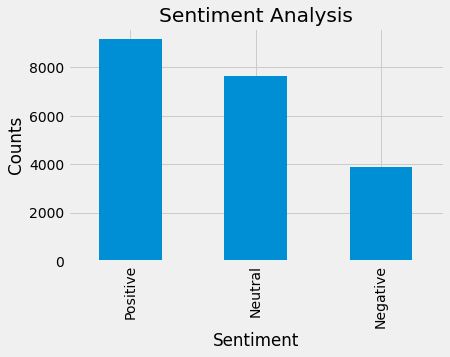

In [298]:
# Show the value counts
df_ny['Analysis'].value_counts()

# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_ny['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [317]:
df_ny.reset_index(drop=True)

,created_at,text,source,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,account_created_at,Subjectivity,Polarity,Analysis
0,2020-03-04T11:22:46Z,Can &amp; focus on tackling potential Corona...,Twitter for iPhone,False,False,25462,0.0,"Queens, NY",city,12378,13567,2009-01-21T21:17:54Z,0.650000,0.500000,Positive
1,2020-03-04T13:46:00Z,(3/3) \n🧳 Self-evaluation of inherent bias/rac...,Twitter for iPhone,False,False,6366,0.0,"Manhattan, NY",city,656,829,2017-12-03T21:45:57Z,0.472727,0.113636,Positive
2,2020-03-04T14:39:30Z,Sensible feedback on the CoronavirusOutbreak,Twitter for iPhone,True,False,1623,0.0,"Manhattan, NY",city,248,1309,2018-02-06T22:46:58Z,0.000000,0.000000,Neutral
3,2020-03-04T14:41:57Z,Bill Gates tried to warn us 4 years ago about ...,Twitter for Android,False,False,39912,0.0,"Brooklyn, NY",city,1511,2619,2009-06-19T20:33:46Z,0.477273,0.018182,Positive
4,2020-03-04T15:44:59Z,👀😁CoronavirusOutbreak,Twitter for iPhone,False,False,41637,0.0,"New York, NY",admin,358,563,2019-05-08T11:02:45Z,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20687,2020-03-25T23:13:33Z,Takeout in the age of coronavirus:\n\nStep 1: ...,Twitter for iPhone,False,False,20,0.0,"New York, NY",admin,3,11,2020-03-07T05:35:22Z,0.638889,0.055556,Positive
20688,2020-03-25T23:22:18Z,JOIN US LIVE: We might be isolated and SocialD...,Twitter for Android,False,False,850,2.0,"New York, NY",admin,1243,954,2008-12-12T16:25:35Z,0.500000,0.136364,Positive
20689,2020-03-25T23:34:43Z,COVID19,Twitter for iPhone,False,False,17646,0.0,"New York, USA",admin,1312,2165,2008-10-27T19:40:19Z,0.000000,0.000000,Neutral
20690,2020-03-25T23:35:05Z,"Missing the Broadcast Center, missing the tea...",Twitter for Android,False,False,294926,0.0,"New York, NY",admin,1394,1369,2010-09-12T17:17:03Z,0.125000,-0.041667,Negative


In [419]:
df_ny_pos = df_ny[df_ny['Analysis']=='Positive']

In [420]:
df_ny_pos['created_at'].iloc[100][0:10:1]

'2020-03-10'

In [421]:
df_ny_pos['date'] = df_ny_pos['created_at'].iloc[9163][0:10:1]

/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [422]:
df_ny_pos.reset_index(drop=True)

,created_at,text,source,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,account_created_at,Subjectivity,Polarity,Analysis,date
0,2020-03-04T11:22:46Z,Can &amp; focus on tackling potential Corona...,Twitter for iPhone,False,False,25462,0.0,"Queens, NY",city,12378,13567,2009-01-21T21:17:54Z,0.650000,0.500000,Positive,2020-03-25
1,2020-03-04T13:46:00Z,(3/3) \n🧳 Self-evaluation of inherent bias/rac...,Twitter for iPhone,False,False,6366,0.0,"Manhattan, NY",city,656,829,2017-12-03T21:45:57Z,0.472727,0.113636,Positive,2020-03-25
2,2020-03-04T14:41:57Z,Bill Gates tried to warn us 4 years ago about ...,Twitter for Android,False,False,39912,0.0,"Brooklyn, NY",city,1511,2619,2009-06-19T20:33:46Z,0.477273,0.018182,Positive,2020-03-25
3,2020-03-04T18:48:36Z,. knows exactly where the death occurred. He'...,Twitter for Android,False,False,28316,1.0,"Staten Island, NY",city,441,753,2009-05-15T04:35:58Z,0.250000,0.250000,Positive,2020-03-25
4,2020-03-04T18:56:53Z,Spotted: A full-fledged Lysol display in a Wes...,Twitter for iPhone,False,False,13237,0.0,"West Babylon, NY",city,1415,1194,2014-10-13T01:06:28Z,0.650000,0.275000,Positive,2020-03-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9159,2020-03-25T22:06:21Z,"Egg crisis in NY, so we got our own chicks. I ...",Twitter for iPhone,False,False,383,0.0,"New York, USA",admin,170,95,2013-12-05T19:53:11Z,0.500000,0.300000,Positive,2020-03-25
9160,2020-03-25T22:32:21Z,so cool seeing your words connect with people ...,Twitter for iPhone,True,False,15259,0.0,"New York, USA",admin,1478,1027,2012-02-16T19:12:40Z,0.331250,0.106250,Positive,2020-03-25
9161,2020-03-25T22:42:20Z,Sales Situation: People falling out of the sky...,Twitter for iPhone,False,False,16276,4.0,"New York, USA",admin,7460,1788,2011-05-31T11:30:12Z,0.650000,0.183333,Positive,2020-03-25
9162,2020-03-25T23:13:33Z,Takeout in the age of coronavirus:\n\nStep 1: ...,Twitter for iPhone,False,False,20,0.0,"New York, NY",admin,3,11,2020-03-07T05:35:22Z,0.638889,0.055556,Positive,2020-03-25


In [423]:
df_ny_pos['created_at'].iloc[9163][0:10:1]

'2020-03-25'

In [424]:
for i in range(0, len(df_ny_pos)):
    df_ny_pos['date'].iloc[i]= df_ny_pos['created_at'].iloc[i][0:10:1]

/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [425]:
df_ny_pos.date.unique()

array(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
       '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
       '2020-03-24', '2020-03-15', '2020-03-23', '2020-03-12',
       '2020-03-18', '2020-03-20', '2020-03-27', '2020-03-16',
       '2020-03-17', '2020-03-26', '2020-03-21', '2020-03-19',
       '2020-03-13', '2020-03-22', '2020-03-28', '2020-03-14',
       '2020-03-25'], dtype=object)

In [426]:
df_ny_pos = df_ny_pos.reset_index(drop=True)

Text(0.5, 1.0, 'positive tweets regarding Covid 19')

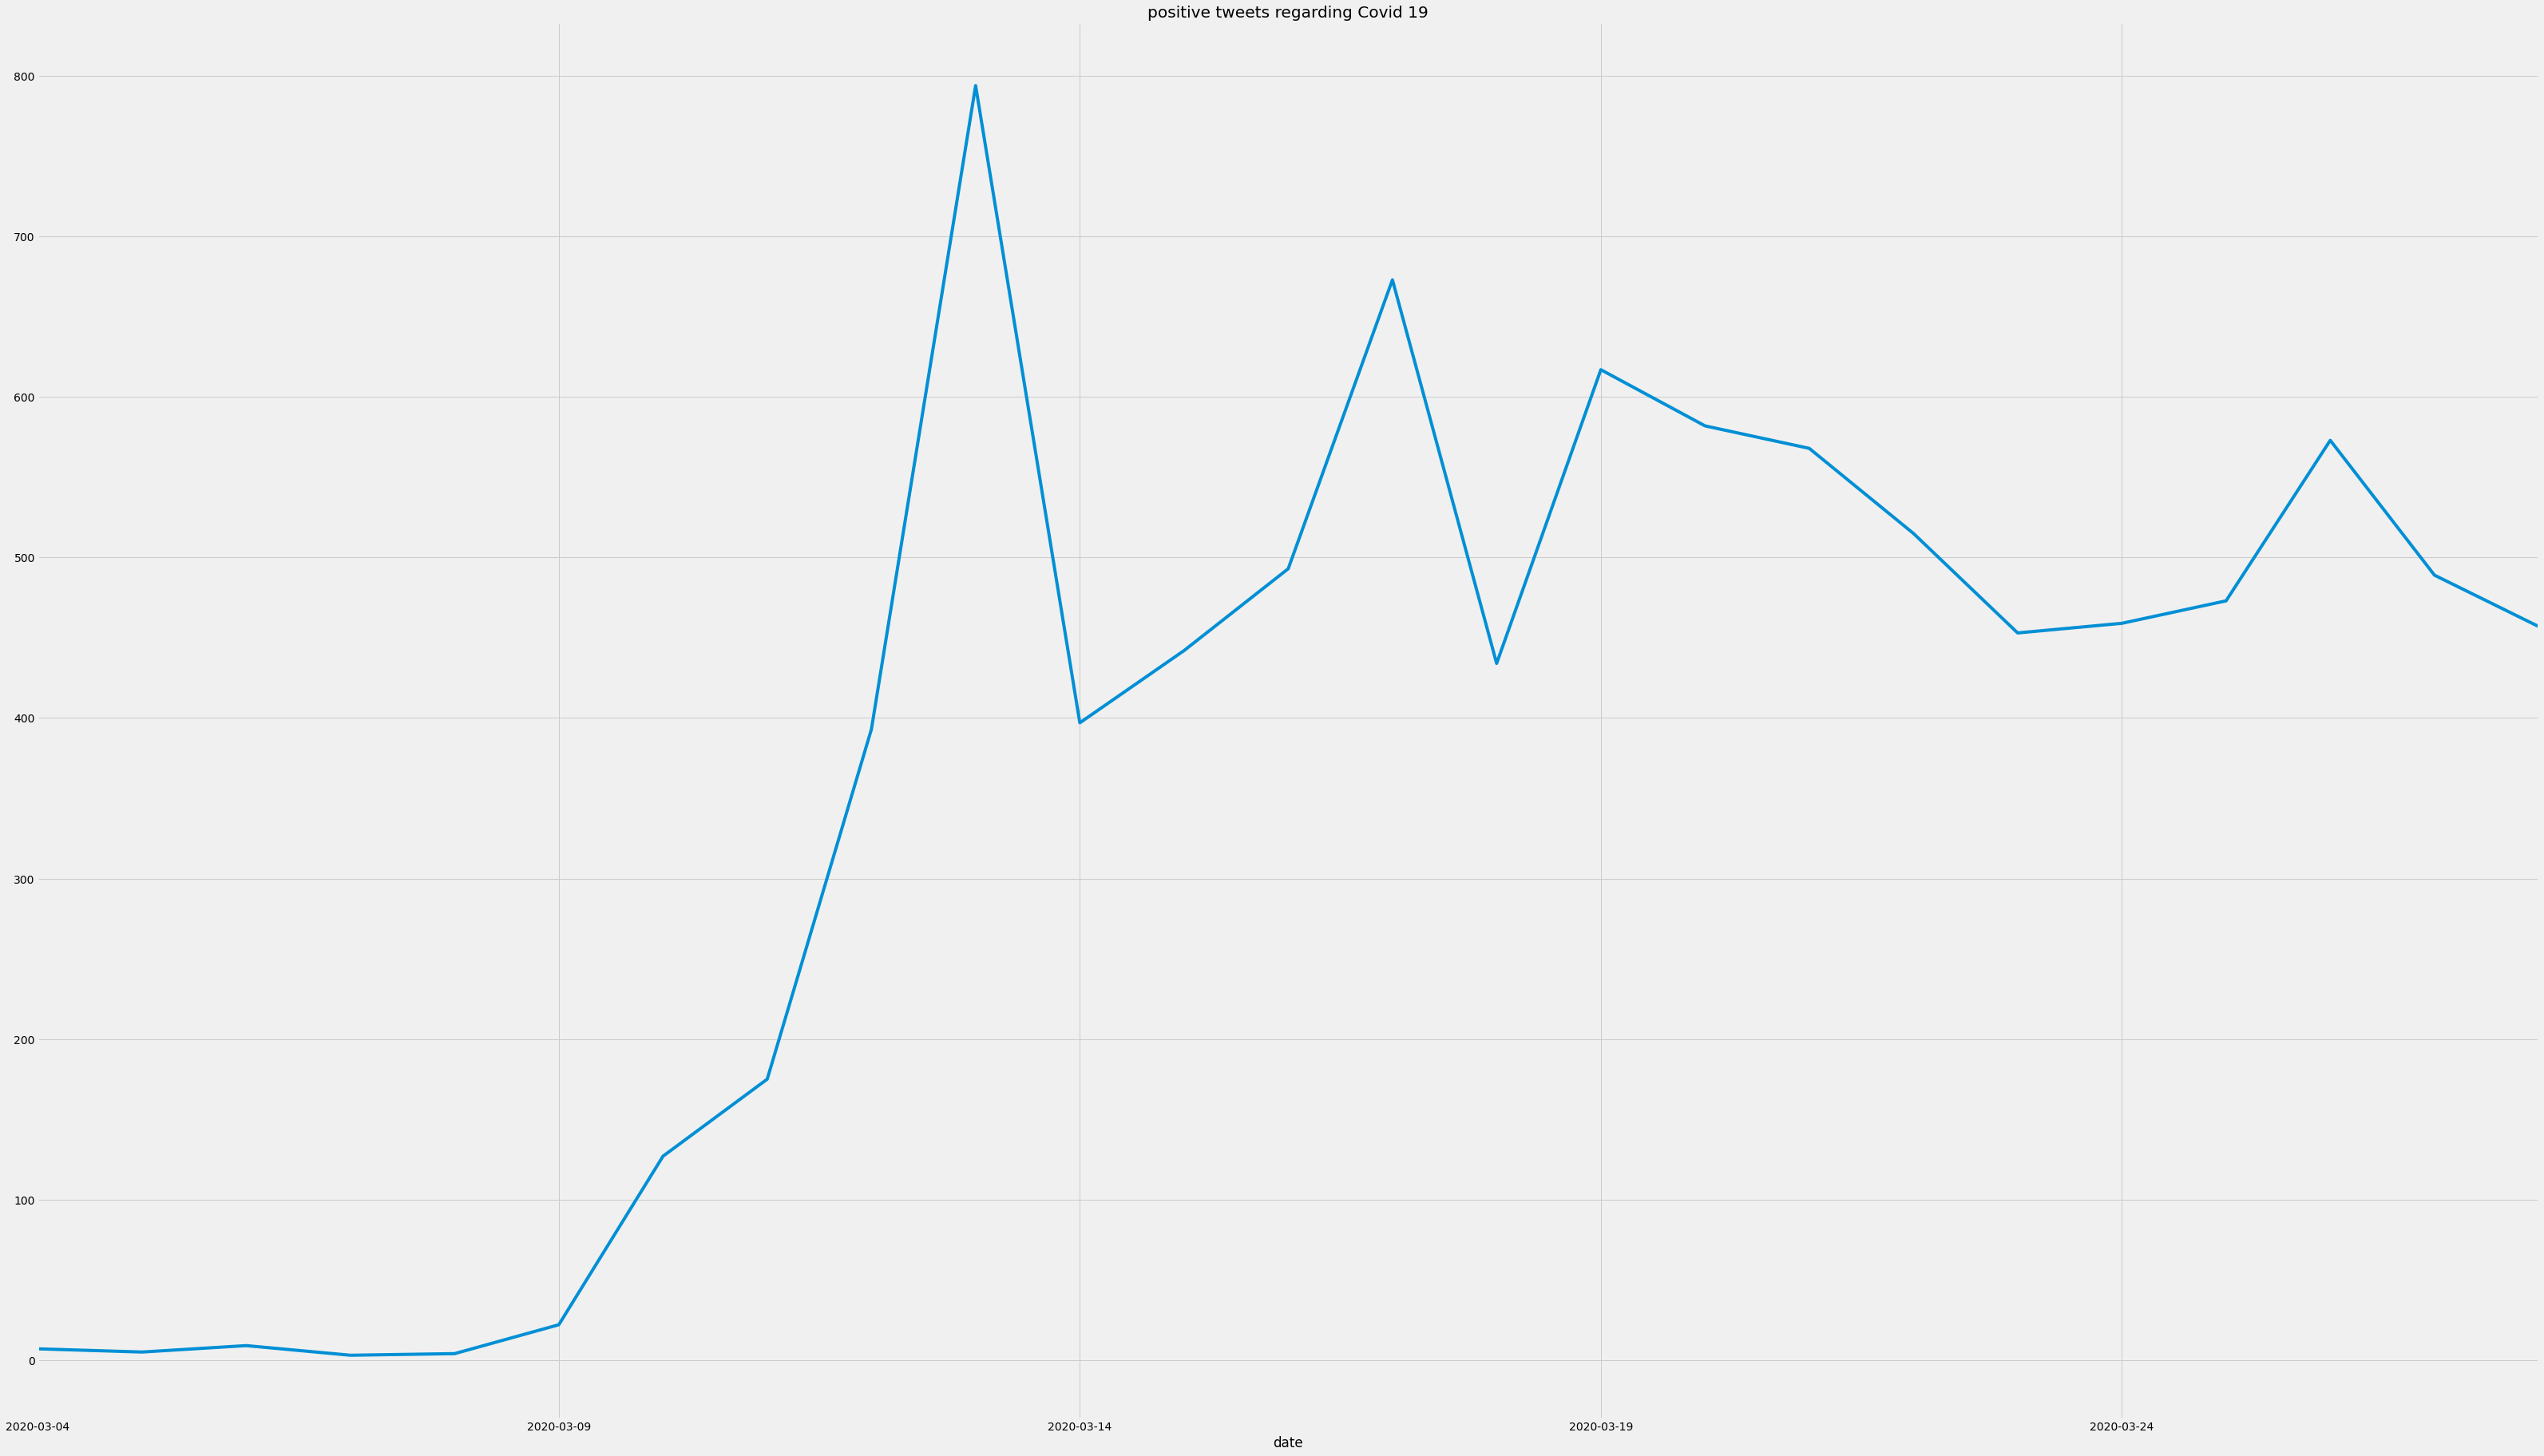

In [427]:
plt.figure(figsize=(50,30))

df_ny_pos.groupby('date').count()['created_at'].plot()
plt.title("positive tweets regarding Covid 19")

### Timeseries of negative tweets 

In [351]:
df_ny_neg = df_ny[df_ny['Analysis']=='Negative']

In [363]:
df_ny_neg.head(1)

,created_at,text,source,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,account_created_at,Subjectivity,Polarity,Analysis,date
2365,2020-03-04T15:46:46Z,It seems like it’s getting a little more real ...,Twitter for iPhone,True,False,23144,0.0,"Manhattan, NY",city,3546,5000,2009-12-03T21:07:38Z,0.5125,-0.06875,Negative,2020-03-04


In [358]:
df_ny_neg['date']=df_ny_neg['created_at'][0:10:1]

/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [360]:
for i in range(0, len(df_ny_neg)):
    df_ny_neg['date'].iloc[i]= df_ny_neg['created_at'].iloc[i][0:10:1]

/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [369]:
df_ny_neg = df_ny_neg.reset_index(drop=True)

In [370]:
df_ny_neg.date.unique()

array(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
       '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
       '2020-03-24', '2020-03-15', '2020-03-23', '2020-03-12',
       '2020-03-18', '2020-03-20', '2020-03-27', '2020-03-16',
       '2020-03-17', '2020-03-26', '2020-03-21', '2020-03-19',
       '2020-03-13', '2020-03-22', '2020-03-28', '2020-03-14',
       '2020-03-25'], dtype=object)

Text(0.5, 1.0, 'Negative tweets regarding Covid 19')

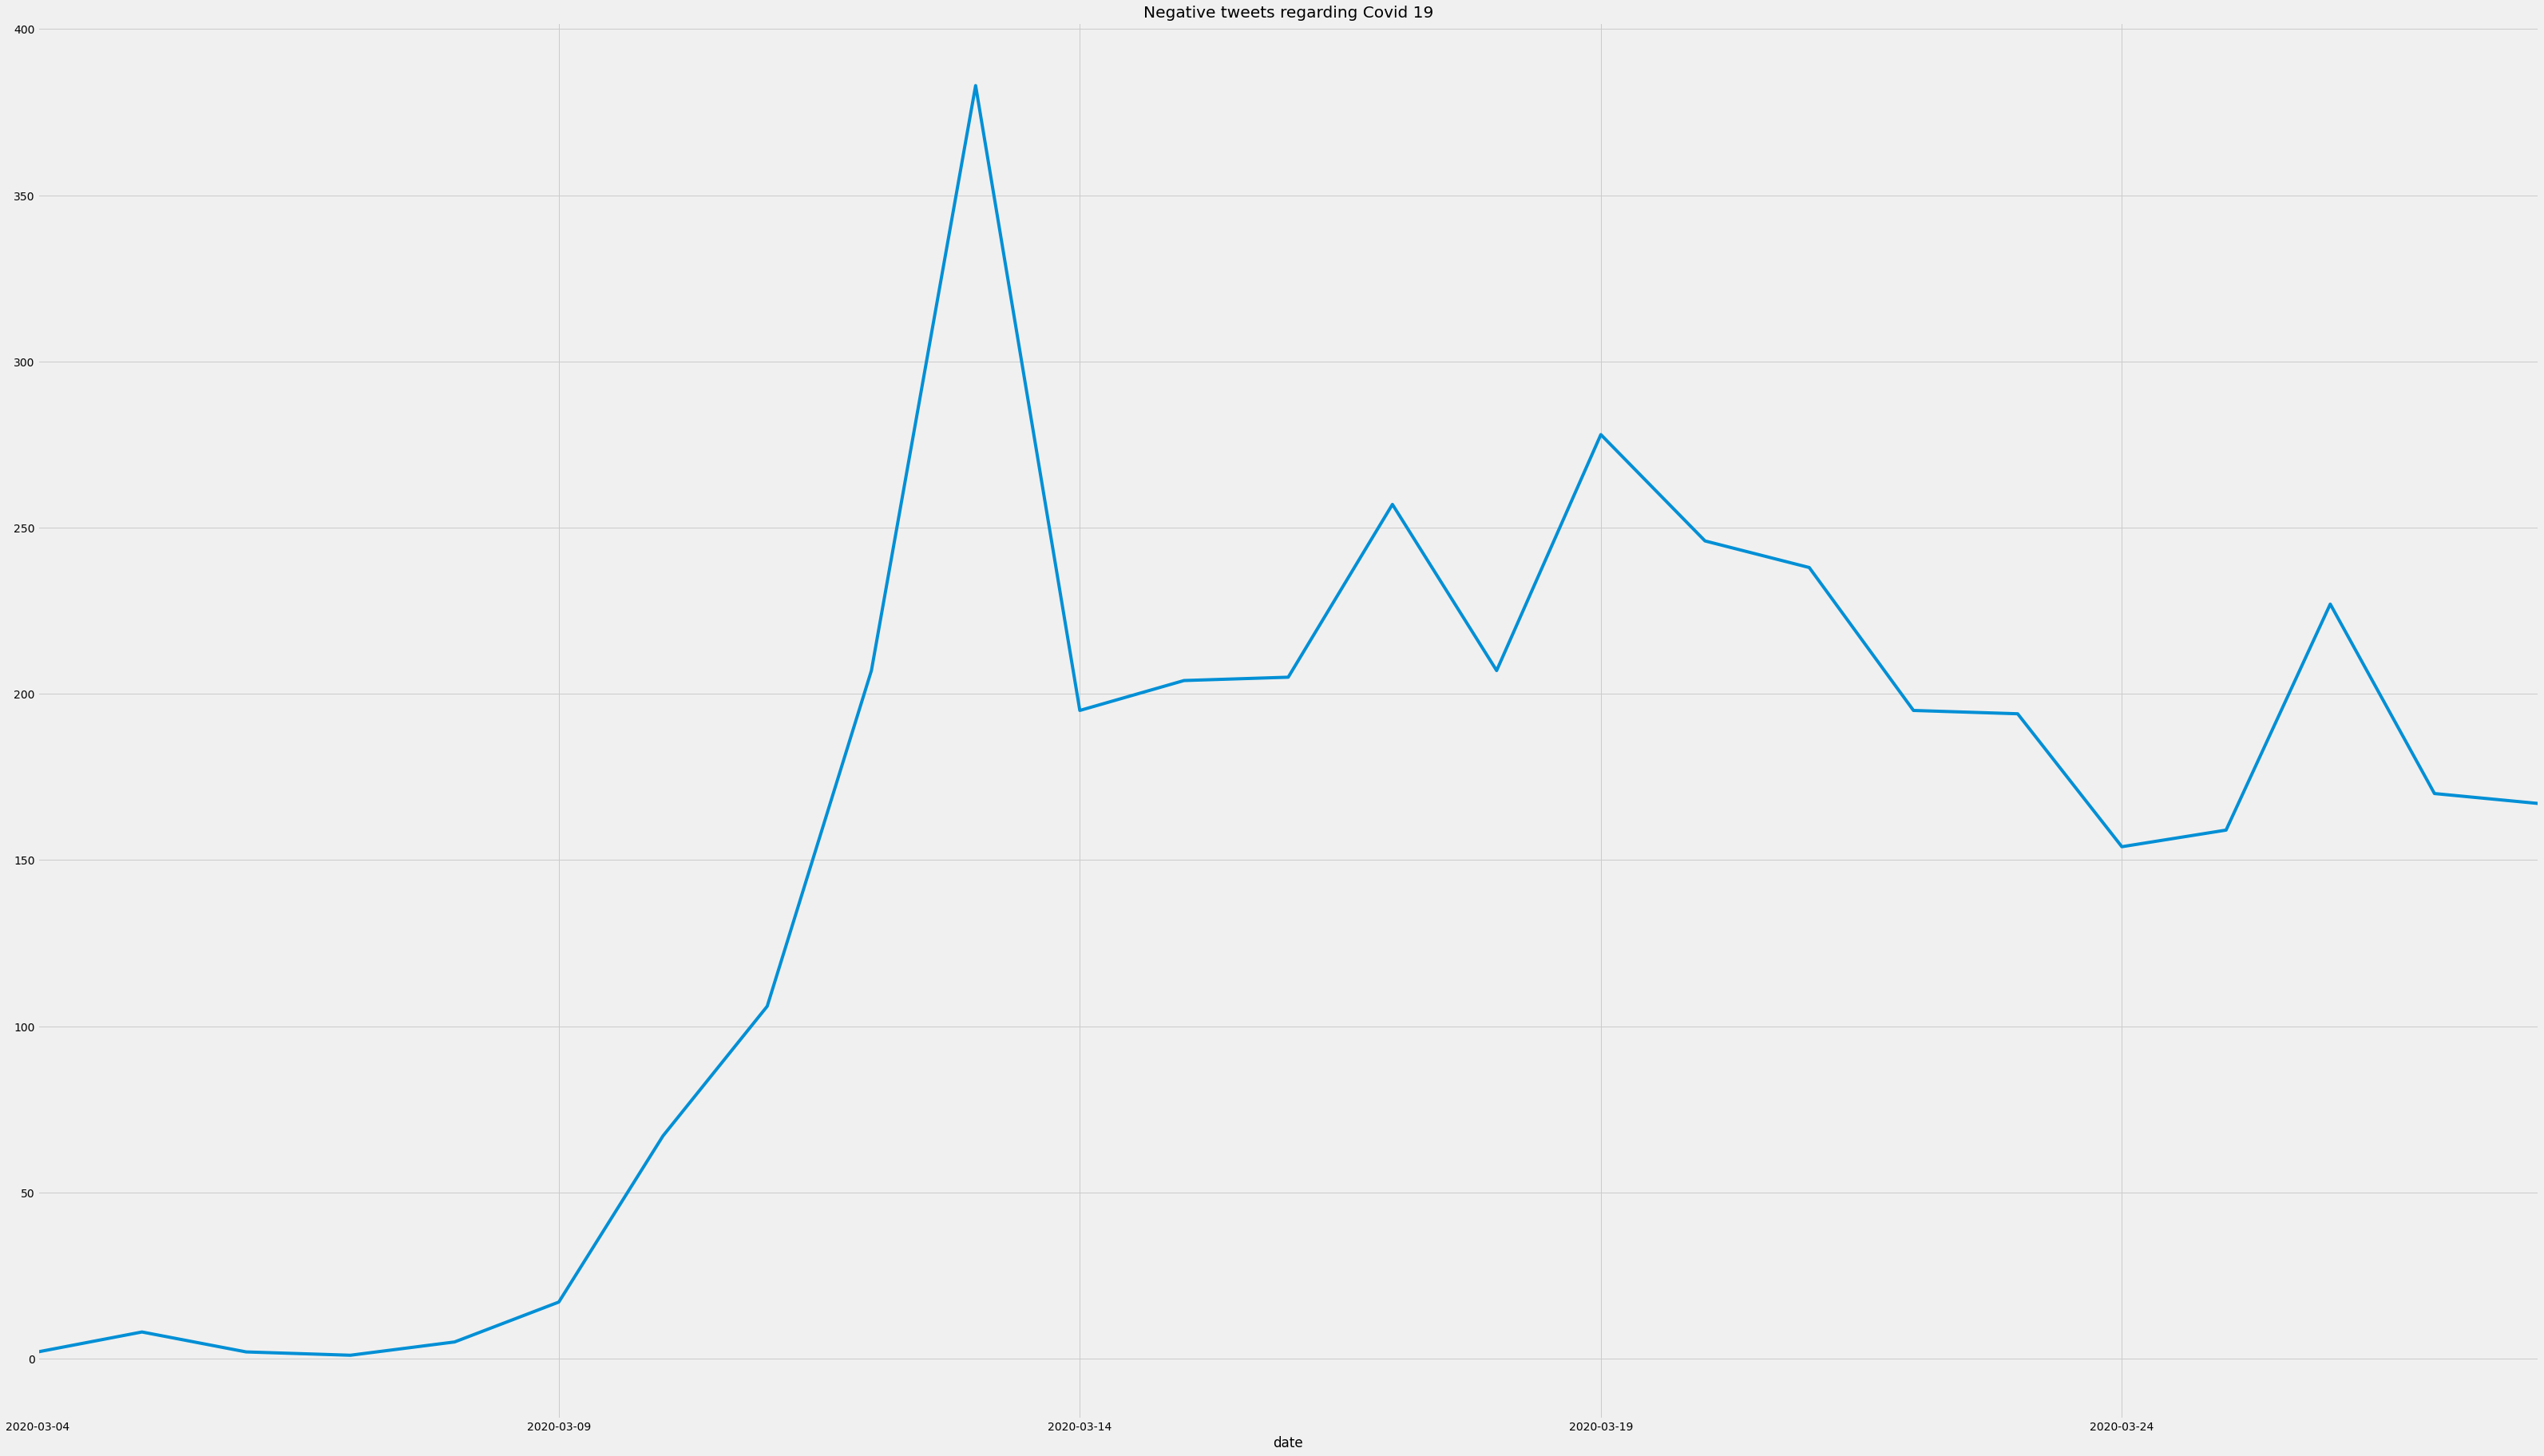

In [371]:
plt.figure(figsize=(50,30))

df_ny_neg.groupby('date').count()['created_at'].plot()
plt.title("Negative tweets regarding Covid 19")

### Neutral 

In [442]:
df_ny_neutral = df_ny[df_ny['Analysis']=='Neutral']

In [443]:
df_ny_neutral

,created_at,text,source,is_quote,is_retweet,favourites_count,retweet_count,place_full_name,place_type,followers_count,friends_count,account_created_at,Subjectivity,Polarity,Analysis,date
1701,2020-03-04T14:39:30Z,Sensible feedback on the CoronavirusOutbreak,Twitter for iPhone,True,False,1623,0.0,"Manhattan, NY",city,248,1309,2018-02-06T22:46:58Z,0.0,0.0,Neutral,2020-03-04
2344,2020-03-04T15:44:59Z,👀😁CoronavirusOutbreak,Twitter for iPhone,False,False,41637,0.0,"New York, NY",admin,358,563,2019-05-08T11:02:45Z,0.0,0.0,Neutral,2020-03-04
2746,2020-03-04T16:33:37Z,🚨BREAKING NEWS🚨 Lando’s 1 Coronavirus preventi...,Twitter for iPhone,False,False,6487,2.0,"Troy, NY",city,773,537,2008-04-01T20:50:24Z,0.0,0.0,Neutral,2020-03-04
5699,2020-03-04T19:51:01Z,But Trump told us all the CoronavirusOutbre...,Twitter for Android,False,False,106062,2.0,"Long Beach, NY",city,471,2321,2009-11-16T18:11:10Z,0.0,0.0,Neutral,2020-03-04
6292,2020-03-04T20:19:29Z,“To hell with ‘in sickness and in health’.” Co...,Twitter for iPhone,False,False,824,3.0,"Manhattan, NY",city,3936,1125,2012-11-20T22:06:41Z,0.0,0.0,Neutral,2020-03-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15355385,2020-03-25T20:26:42Z,This would be a disaster for seniors and ppl w...,Twitter for Android,True,False,402,5.0,"New York, USA",admin,548,233,2012-03-27T20:52:14Z,1.0,0.0,Neutral,2020-03-25
15394464,2020-03-25T21:35:00Z,Anyone going to declare unfit for office? He ...,Twitter for iPhone,False,False,1870,0.0,"New York, USA",admin,122,367,2014-08-20T01:13:40Z,0.0,0.0,Neutral,2020-03-25
15401025,2020-03-25T21:47:20Z,"You are not alone, we are all in this together...",Instagram,False,False,1145,0.0,"New York, USA",admin,691,1892,2011-02-04T23:28:25Z,0.0,0.0,Neutral,2020-03-25
15453231,2020-03-25T23:34:43Z,COVID19,Twitter for iPhone,False,False,17646,0.0,"New York, USA",admin,1312,2165,2008-10-27T19:40:19Z,0.0,0.0,Neutral,2020-03-25


In [444]:
df_ny_neutral = df_ny_neutral.reset_index(drop=True)

In [445]:
df_ny_neutral = df_ny_neutral.dropna(subset=['created_at'])

In [446]:
df_ny_neutral['date']= ''

In [447]:
for i in range(0, len(df_ny_neutral)):
#     print(i)
#     print(df_ny_neutral['created_at'].iloc[i])
    df_ny_neutral['date'].iloc[i]= df_ny_neutral['created_at'].iloc[i][0:10:1]

0
2020-03-04T14:39:30Z
1
2020-03-04T15:44:59Z
2
2020-03-04T16:33:37Z
3
2020-03-04T19:51:01Z
4
2020-03-04T20:19:29Z
5
2020-03-04T22:52:16Z
6
2020-03-04T23:33:21Z
7
2020-03-05T00:14:20Z
8
2020-03-05T00:16:34Z
9
2020-03-05T00:21:03Z
10
2020-03-05T00:42:34Z
11
2020-03-05T01:05:08Z
12
2020-03-05T13:25:02Z
13
2020-03-05T13:28:15Z
14
2020-03-05T14:13:28Z
15
2020-03-05T14:13:35Z
16
2020-03-05T14:21:34Z
17
2020-03-05T18:26:41Z
18
2020-03-05T18:31:54Z
19
2020-03-05T21:39:11Z
20
2020-03-06T10:50:26Z
21
2020-03-06T15:58:18Z
22
2020-03-06T17:35:15Z
23
2020-03-06T22:06:48Z
24
2020-03-07T03:18:38Z
25
2020-03-07T03:25:08Z
26
2020-03-07T03:39:19Z
27
2020-03-07T12:47:52Z
28
2020-03-08T19:08:01Z
29
2020-03-08T20:38:06Z
30
2020-03-08T21:11:44Z
31
2020-03-08T23:45:37Z
32
2020-03-09T00:07:42Z
33
2020-03-09T00:55:50Z
34
2020-03-09T00:57:20Z
35
2020-03-09T00:57:30Z
36
2020-03-09T01:03:37Z
37
2020-03-09T02:18:17Z
38
2020-03-09T03:53:19Z
39
2020-03-09T05:00:04Z
40
2020-03-09T09:42:53Z
41
2020-03-09T10:56:01Z
42

/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)



2020-03-24T16:40:05Z
421
2020-03-24T16:40:47Z
422
2020-03-24T16:44:03Z
423
2020-03-24T16:44:07Z
424
2020-03-24T16:46:30Z
425
2020-03-24T16:53:33Z
426
2020-03-24T17:03:26Z
427
2020-03-24T17:18:08Z
428
2020-03-24T17:35:26Z
429
2020-03-24T17:42:03Z
430
2020-03-24T17:42:50Z
431
2020-03-24T17:43:59Z
432
2020-03-24T18:10:51Z
433
2020-03-24T18:13:16Z
434
2020-03-24T18:29:56Z
435
2020-03-24T18:29:58Z
436
2020-03-24T18:56:26Z
437
2020-03-24T19:02:14Z
438
2020-03-24T19:08:01Z
439
2020-03-24T19:10:54Z
440
2020-03-24T19:18:27Z
441
2020-03-24T19:25:09Z
442
2020-03-24T19:30:30Z
443
2020-03-24T19:30:37Z
444
2020-03-24T19:38:57Z
445
2020-03-24T19:46:59Z
446
2020-03-24T19:47:01Z
447
2020-03-24T19:48:45Z
448
2020-03-24T19:51:36Z
449
2020-03-24T19:54:22Z
450
2020-03-24T19:58:30Z
451
2020-03-24T20:04:51Z
452
2020-03-24T20:05:10Z
453
2020-03-24T20:17:00Z
454
2020-03-24T20:17:01Z
455
2020-03-24T20:22:05Z
456
2020-03-24T20:28:07Z
457
2020-03-24T20:28:42Z
458
2020-03-24T20:32:33Z
459
2020-03-24T20:33:12Z
460

In [448]:
df_ny_neutral.date.unique()

array(['2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
       '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
       '2020-03-24', '2020-03-15', '2020-03-23', '2020-03-12',
       '2020-03-18', '2020-03-20', '2020-03-27', '2020-03-16',
       '2020-03-17', '2020-03-26', '2020-03-21', '2020-03-19',
       '2020-03-13', '2020-03-22', '2020-03-28', '2020-03-14',
       '2020-03-25'], dtype=object)

Text(0.5, 1.0, 'Neutral tweets regarding Covid 19')

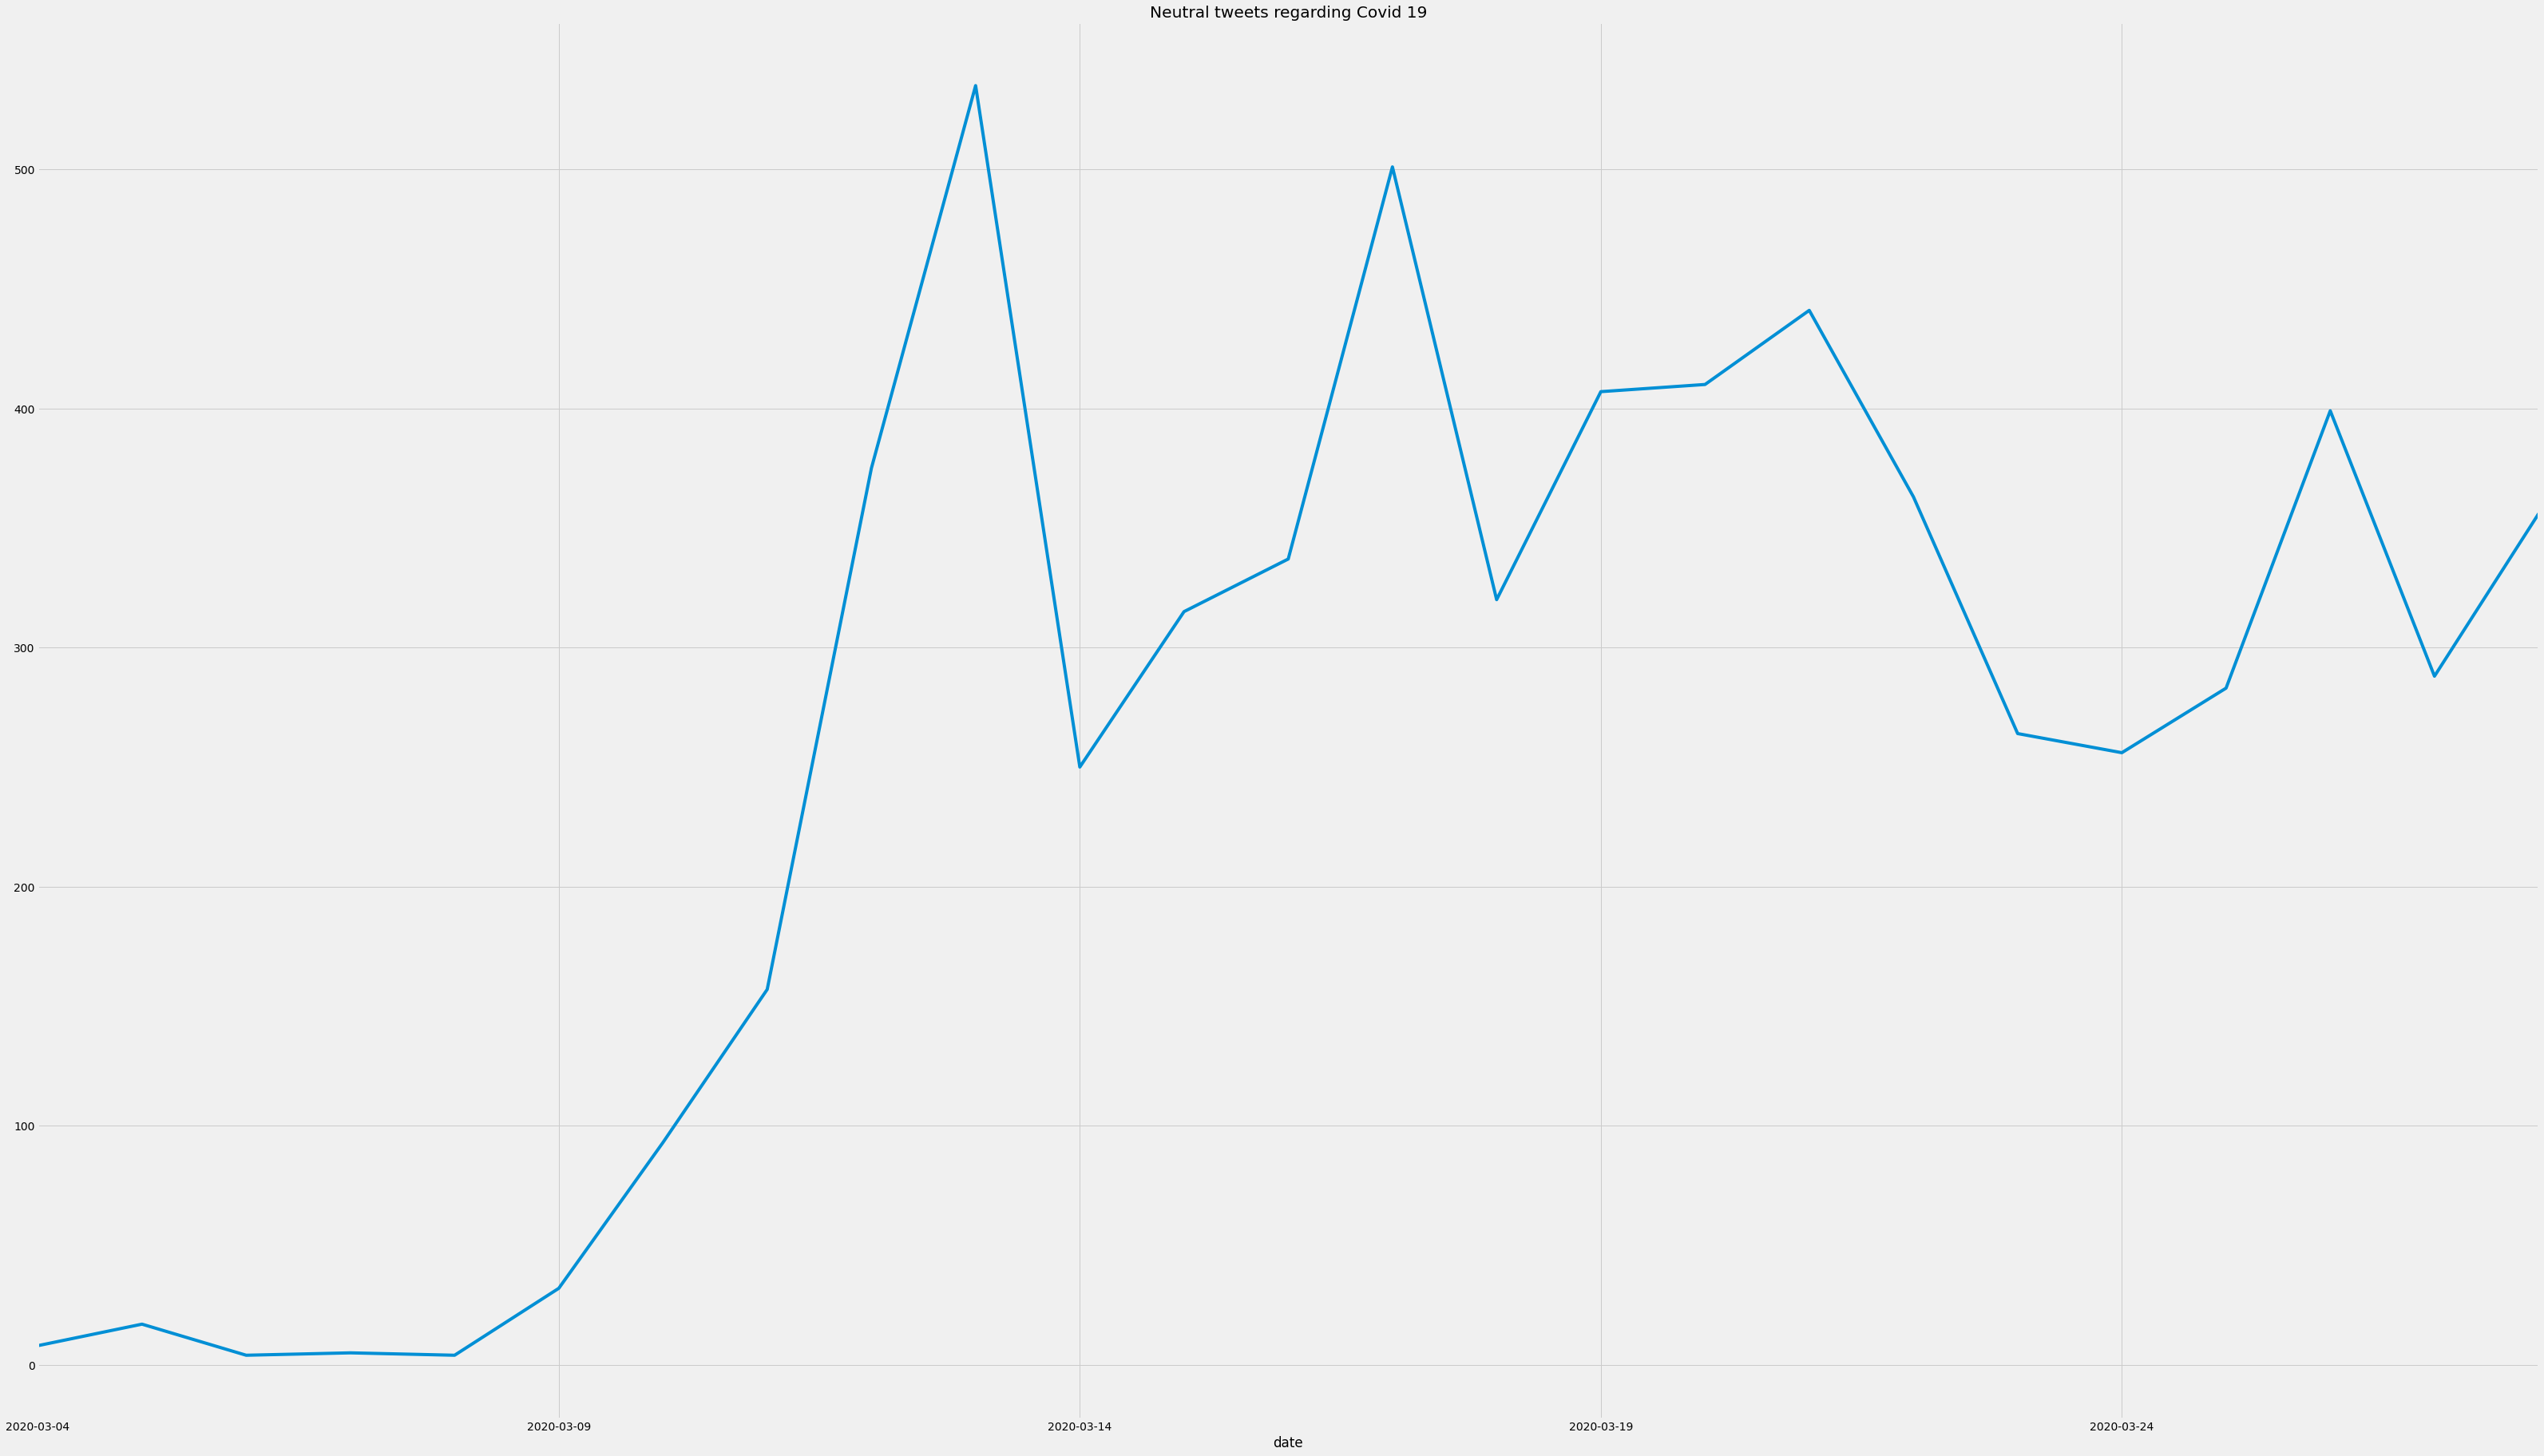

In [449]:
plt.figure(figsize=(50,30))

df_ny_neutral.groupby('date').count()['created_at'].plot()
plt.title("Neutral tweets regarding Covid 19")

### Feeding in all tweets regardless of sentiment

In [410]:
df_ny= df_ny.dropna(subset=['created_at'])

In [412]:
df_ny['date']= ''

/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [413]:
for i in range(0, len(df_ny)):
    print(i)
    print(df_ny['created_at'].iloc[i])
    df_ny['date'].iloc[i]= df_ny['created_at'].iloc[i][0:10:1]

0
2020-03-04T11:22:46Z
1
2020-03-04T13:46:00Z
2
2020-03-04T14:39:30Z
3
2020-03-04T14:41:57Z
4
2020-03-04T15:44:59Z
5
2020-03-04T15:46:46Z
6
2020-03-04T16:33:37Z
7
2020-03-04T18:48:36Z
8
2020-03-04T18:56:53Z
9
2020-03-04T18:59:49Z
10
2020-03-04T19:51:01Z
11
2020-03-04T20:19:29Z
12
2020-03-04T22:52:16Z
13
2020-03-04T23:13:06Z
14
2020-03-04T23:33:21Z
15
2020-03-04T23:47:47Z
16
2020-03-05T00:14:20Z
17
2020-03-05T00:16:34Z
18
2020-03-05T00:21:03Z
19
2020-03-05T00:40:51Z
20
2020-03-05T00:42:34Z
21
2020-03-05T01:05:08Z
22
2020-03-05T02:59:11Z
23
2020-03-05T13:12:23Z
24
2020-03-05T13:25:02Z
25
2020-03-05T13:28:15Z
26
2020-03-05T13:33:58Z
27
2020-03-05T14:11:21Z
28
2020-03-05T14:13:28Z
29
2020-03-05T14:13:35Z
30
2020-03-05T14:21:34Z
31
2020-03-05T14:30:12Z
32
2020-03-05T14:38:45Z
33
2020-03-05T14:46:48Z
34
2020-03-05T15:30:28Z
35
2020-03-05T18:14:34Z
36
2020-03-05T18:26:41Z
37
2020-03-05T18:31:54Z
38
2020-03-05T19:18:08Z
39
2020-03-05T19:53:36Z
40
2020-03-05T21:39:11Z
41
2020-03-05T22:21:37Z
42

/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/armandoordoricadelatorre/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.



2020-03-10T16:55:27Z
273
2020-03-10T16:56:39Z
274
2020-03-10T16:58:28Z
275
2020-03-10T17:09:36Z
276
2020-03-10T17:11:02Z
277
2020-03-10T17:12:44Z
278
2020-03-10T17:15:26Z
279
2020-03-10T17:18:45Z
280
2020-03-10T17:19:07Z
281
2020-03-10T17:27:21Z
282
2020-03-10T17:28:05Z
283
2020-03-10T17:29:24Z
284
2020-03-10T17:32:17Z
285
2020-03-10T17:35:30Z
286
2020-03-10T17:38:24Z
287
2020-03-10T17:38:50Z
288
2020-03-10T17:40:46Z
289
2020-03-10T17:42:36Z
290
2020-03-10T17:48:31Z
291
2020-03-10T17:48:34Z
292
2020-03-10T17:50:23Z
293
2020-03-10T17:50:42Z
294
2020-03-10T17:51:05Z
295
2020-03-10T17:53:24Z
296
2020-03-10T17:58:34Z
297
2020-03-10T17:58:58Z
298
2020-03-10T18:01:05Z
299
2020-03-10T18:03:30Z
300
2020-03-10T18:03:33Z
301
2020-03-10T18:11:11Z
302
2020-03-10T18:11:21Z
303
2020-03-10T18:13:51Z
304
2020-03-10T18:18:54Z
305
2020-03-10T18:19:31Z
306
2020-03-10T18:23:09Z
307
2020-03-10T18:24:40Z
308
2020-03-10T18:30:12Z
309
2020-03-10T18:34:03Z
310
2020-03-10T18:36:48Z
311
2020-03-10T18:41:07Z
312

Text(0.5, 1.0, 'Neutral tweets regarding Covid 19')

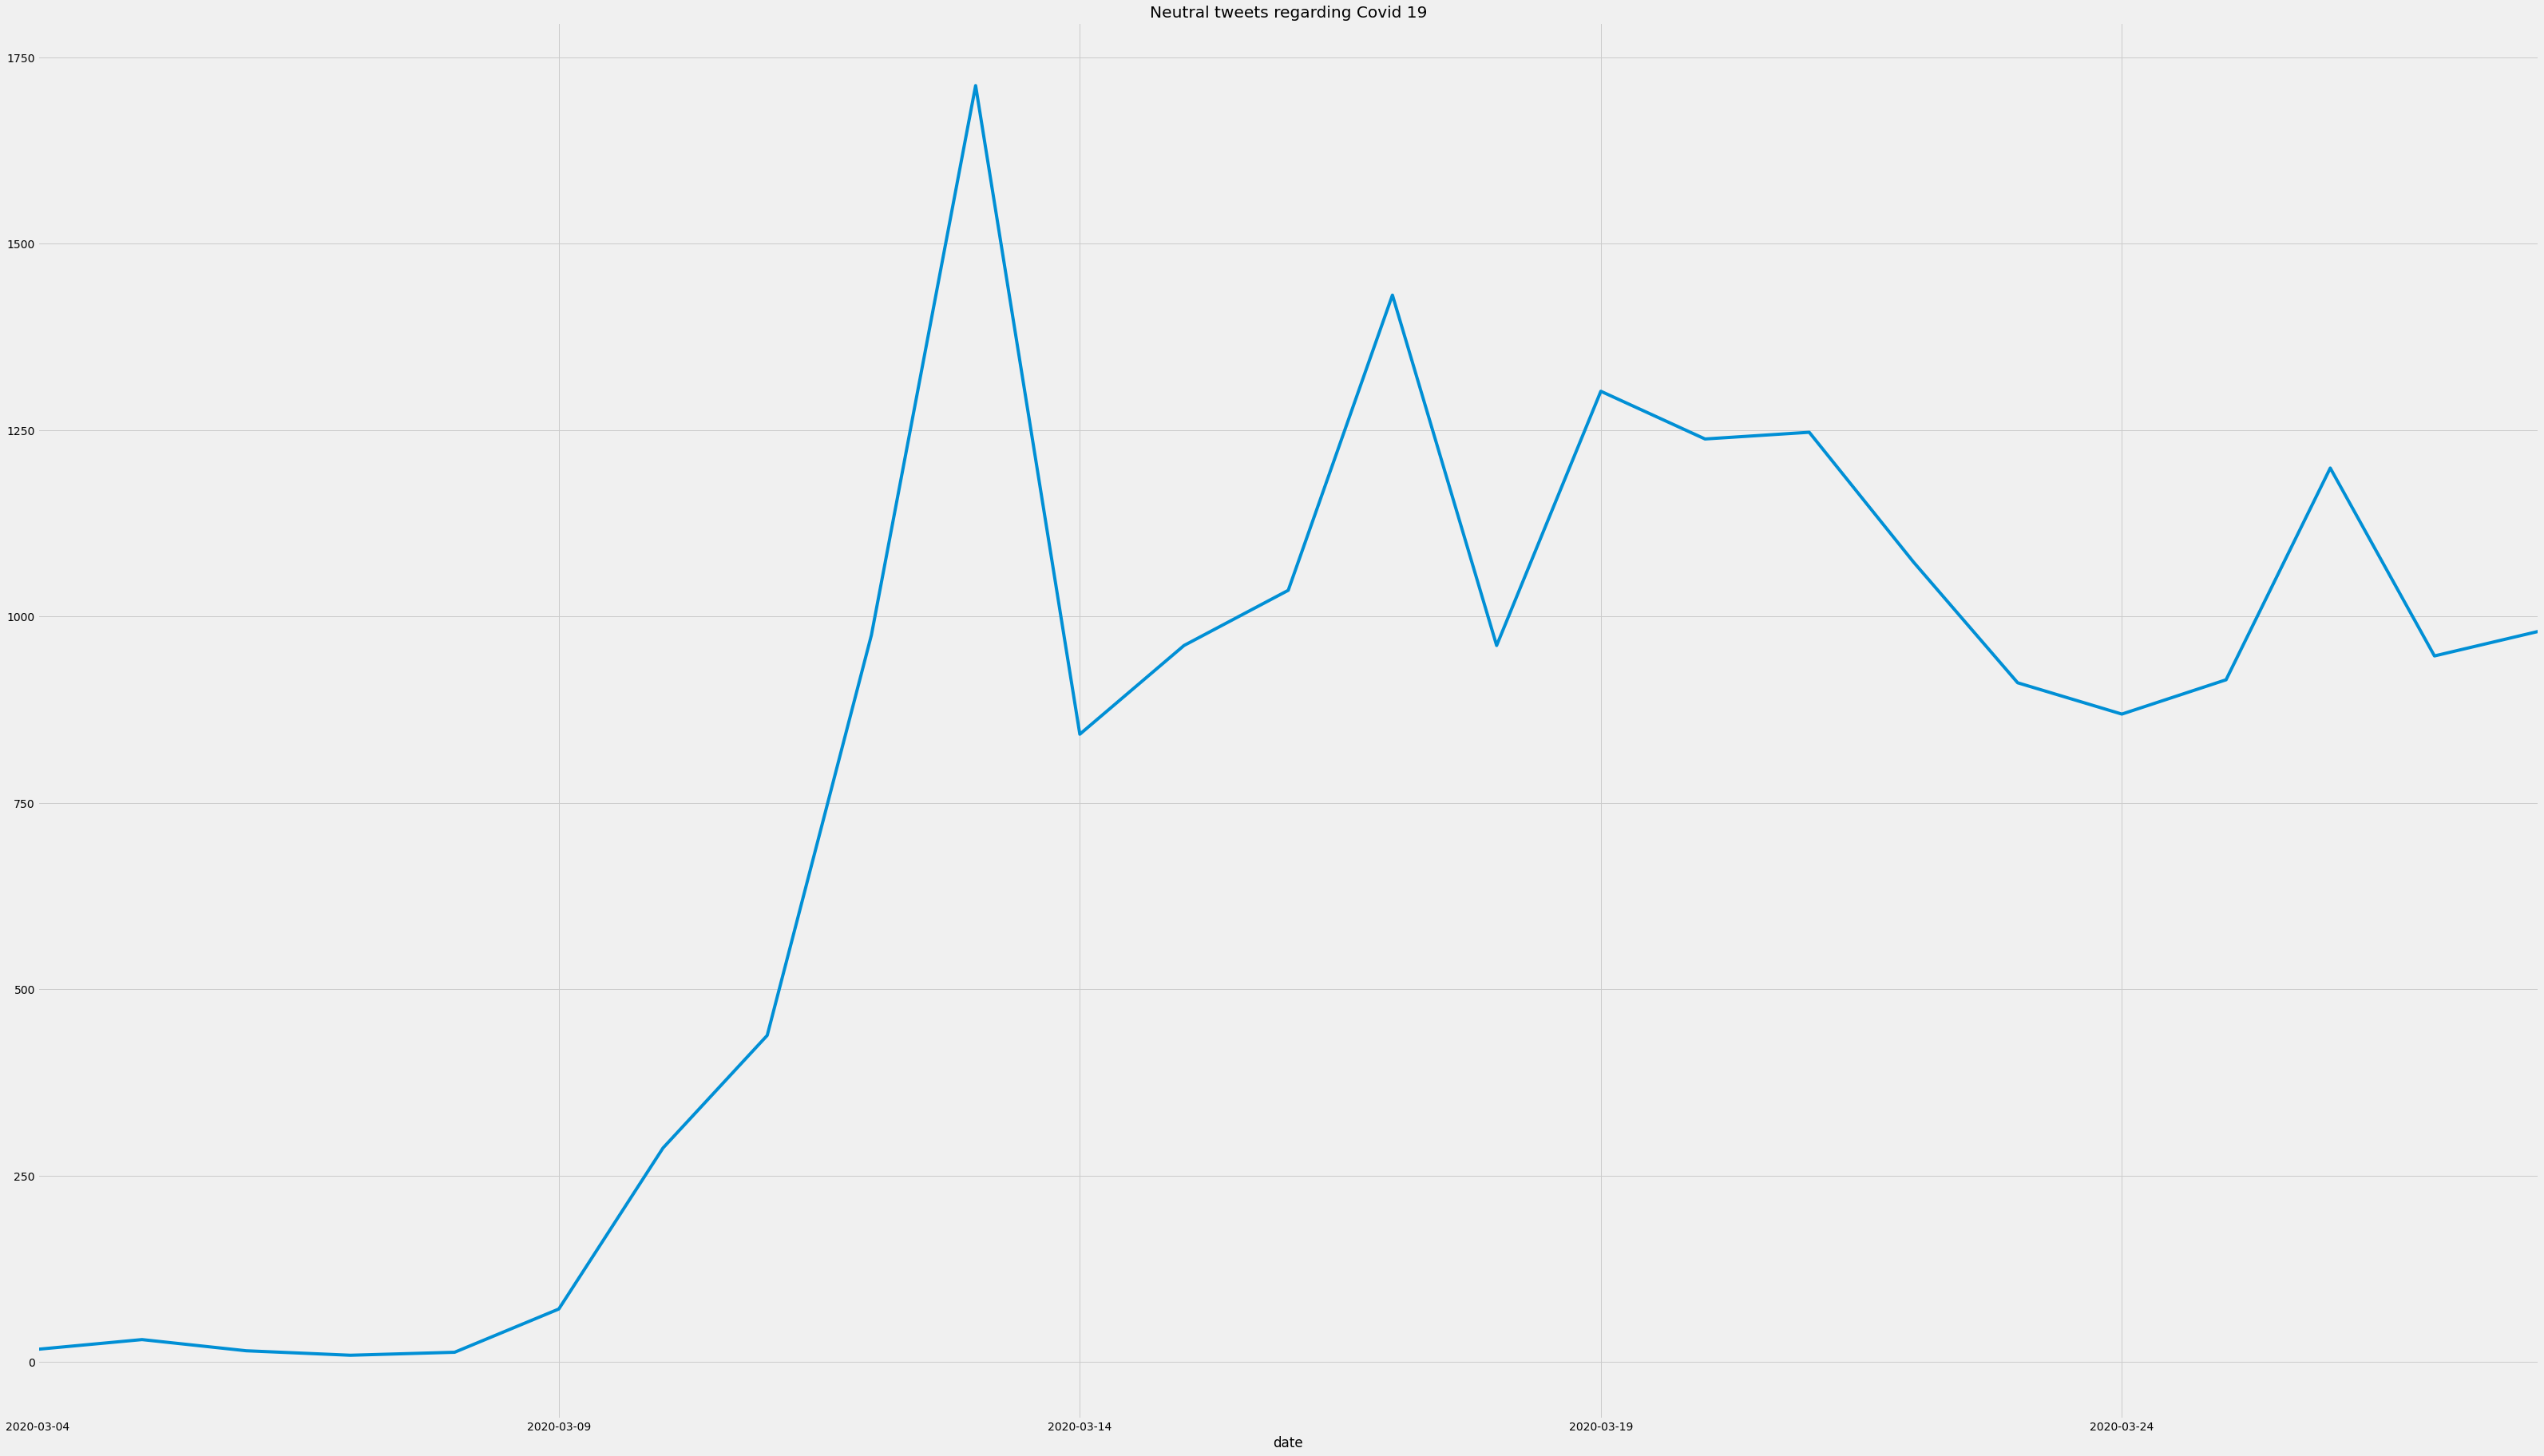

In [414]:
plt.figure(figsize=(50,30))

df_ny.groupby('date').count()['created_at'].plot()
plt.title("Neutral tweets regarding Covid 19")

In [430]:
all_series = df_ny.groupby('date').count()['created_at']

In [434]:
pos_series = df_ny_pos.groupby('date').count()['created_at']

In [435]:
neg_series = df_ny_neg.groupby('date').count()['created_at']

In [450]:
neutral_series = df_ny_neutral.groupby('date').count()['created_at']

In [456]:
df1 = pd.merge(all_series, pos_series, on='date', how='left')

In [458]:
df2 = pd.merge(df1, neg_series, on='date', how='left')

In [459]:
df3 = pd.merge(df2, neutral_series, on='date', how='left')

In [461]:
df3.columns = ['all tweets', 'positive tweets', 'negative tweets', 'neutral tweets']

In [463]:
df3['Total'] = df3['positive tweets'] + df3['negative tweets'] + df3['neutral tweets']

In [465]:
df3.to_csv("sentiment_analysis_time_series_nyc_twitter.csv")